In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Generating synthetic non-linear data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)  # 100 samples of a single feature
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

In [3]:
X

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722,
        9.65896945,  0.03914421, -0.5933086 ,  4.22649506, -4.80926387,
        6.36309702,  1.86272445,  2.56155155, -2.59833764, -2.40807631,
        1.53515772,  0.86551244,  4.66335724,  7.9423894 ,  3.04373645,
        1.53095309, -1.69087204, -1.60713955,  3.16198045,  2.90690825,
        5.1456589 ,  6.26005381,  7.11881057, -3.85232619,  3.52895655,
        3.3142229 ,  5.75838608, -0.33247107,  6.84169354,  2.63822084,
        4.68639968,  0.83929251,  3.53241541,  5.54189655,  2.08454669,
        0.71500439,  1.80044833,  1.09258431,  3.90296628,  3.0882235 ,
        4.01738134,  3.07865948,  4.43943885,  7.17884781,  1.46772157,
        3.20534281,  6.89059504,  0.61165323,  4.72189509,  1.84

In [4]:
X.ndim

1

In [5]:
# Reshape X to be a 2D array (requiered by scikit-learn)
X = X[:, np.newaxis]
X.ndim

2

In [6]:
X

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722],
       [ 9.65896945],
       [ 0.03914421],
       [-0.5933086 ],
       [ 4.22649506],
       [-4.80926387],
       [ 6.36309702],
       [ 1.86272445],
       [ 2.56155155],
       [-2.59833764],
       [-2.40807631],
       [ 1.53515772],
       [ 0.86551244],
       [ 4.66335724],
       [ 7.9423894 ],
       [ 3.04373645],
       [ 1.53095309],
       [-1.69087204],
       [-1.60713955],
       [ 3.16198045],
       [ 2.90690825],
       [ 5.1456589 ],
       [ 6.26005381],
       [ 7.11881057],
       [-3.85232619],
       [ 3.52895655],
       [ 3

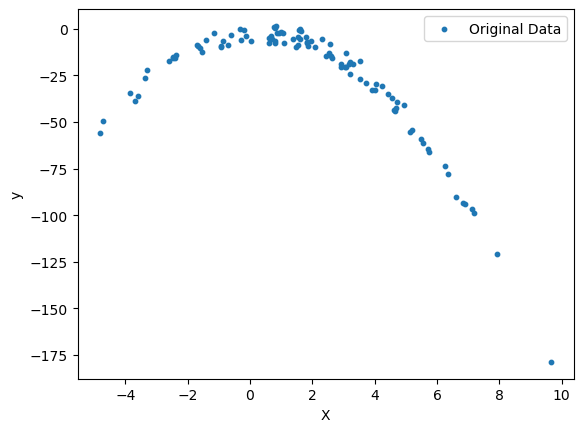

In [7]:
# Plot the original data
plt.scatter(X, y, s=10, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [9]:
# Transforming the data to include polynomial features (degreee 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly


array([[ 1.00000000e+00, -3.29215704e+00,  1.08382980e+01],
       [ 1.00000000e+00,  7.99528375e-01,  6.39245622e-01],
       [ 1.00000000e+00, -9.36213952e-01,  8.76496565e-01],
       [ 1.00000000e+00, -4.72267960e+00,  2.23037026e+01],
       [ 1.00000000e+00, -3.60267397e+00,  1.29792597e+01],
       [ 1.00000000e+00,  4.93183364e+00,  2.43229830e+01],
       [ 1.00000000e+00, -8.50265253e-01,  7.22951000e-01],
       [ 1.00000000e+00,  2.45407162e+00,  6.02246754e+00],
       [ 1.00000000e+00,  2.30965656e+00,  5.33451340e+00],
       [ 1.00000000e+00,  7.68204494e-01,  5.90138145e-01],
       [ 1.00000000e+00,  1.56786929e+00,  2.45821410e+00],
       [ 1.00000000e+00, -2.36282052e+00,  5.58292081e+00],
       [ 1.00000000e+00, -2.83113175e-01,  8.01530701e-02],
       [ 1.00000000e+00,  1.63497495e+00,  2.67314309e+00],
       [ 1.00000000e+00,  6.68410302e-01,  4.46772332e-01],
       [ 1.00000000e+00,  9.98977018e-01,  9.97955082e-01],
       [ 1.00000000e+00, -2.48223722e+00

In [10]:
# Fitting a linear regression model on the transformed data
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [11]:
# Making predictions
y_pred = model.predict(X_poly)

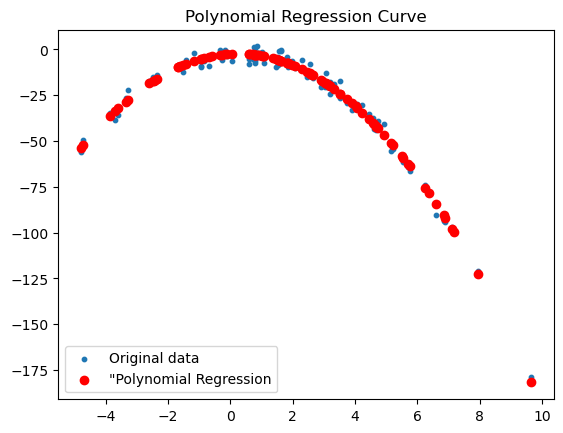

In [13]:
plt.scatter(X, y, s=10, label='Original data')
plt.scatter(X, y_pred, color='r', label='"Polynomial Regression') 
plt.legend()
plt.title('Polynomial Regression Curve')
plt.show()


In [14]:
# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.          0.96597113 -2.02225052]
Intercept: -2.4148356673536284


In [18]:
# Cross-Validation to Select the Best Degree
from sklearn.model_selection import cross_val_score

# Try different degrees of polynomial 
for degree in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Degree {degree}: Mean Squared Error = {-scores.mean()}")



Degree 1: Mean Squared Error = 615.8337620812341
Degree 2: Mean Squared Error = 9.99093434965916
Degree 3: Mean Squared Error = 11.502758210284568
Degree 4: Mean Squared Error = 10.344848227025414
Degree 5: Mean Squared Error = 16.262369293097702
